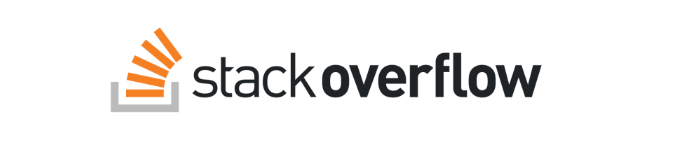

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import defaultdict, Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
from sklearn.manifold import TSNE
from wordcloud import WordCloud, STOPWORDS
import gc
import nltk
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
# Download the required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\perso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\perso\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_csv("QueryResults_explored.csv")
print(df.shape)

(47610, 7)


In [3]:
df

,Words_filtered,Words_filtered_len,Tags_filtered,Tags_filtered_len,Texte_len,Tags_len,Tags_len_ratio
0,path test property window looks like made run ...,20.0,ios iphone ipad,3.0,109,15,7.0
1,find cause double free error im application im...,26.0,iphone objectivec memorymanagement,3.0,141,34,4.0
2,window event wpf id like handle event user rig...,35.0,c wpf xaml,3.0,202,10,20.0
3,vs im timeout java container currently session...,25.0,java,1.0,150,4,38.0
4,list ok info break format would work well comm...,34.0,c c debugging,3.0,205,13,16.0
...,...,...,...,...,...,...,...
47605,object custom format net way objects custom fo...,8.0,c net string,3.0,50,12,4.0
47606,replace statement inside loop replace statemen...,29.0,oop,1.0,168,3,56.0
47607,thread javascript code execute far understand ...,34.0,javascript multithreading,2.0,230,25,9.0
47608,android dependency cache may build import proj...,30.0,java android androidstudio gradle,4.0,212,33,6.0


In [4]:
# corpus de textes d'exemple
words_series = df['Words_filtered']

# convert the Series into a list
Words = words_series.tolist()

In [5]:
Words

['path test property window looks like made run self null looks like like block node path see path ideas thanks',
 'find cause double free error im application im error error object x double free set debug release cant figure object im set way know object x',
 'window event wpf id like handle event user right x button window order display message know event window use property im im sure good approach think good approach would event command gt doesnt work code',
 'vs im timeout java container currently session timeout set file like im session use activity im approach correct one set time dont want methods config',
 'list ok info break format would work well command question method file input sometimes session set file problem command info break command list rather table sample info break info break type address keep x',
 'currently code values type information ui back java multiple types eg etc type static method takes single parameter returns type object name types description valid e

# Models supervisés
## Tf idf
* TF = nombre de fois où le mot est dans le document / nombre de mots dans le document
* IDF = nombre de documents / nombre de documents où apparaît le mot

In [6]:
# Define the number of features to use
no_features = 1000

# Define the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, 
                                    min_df=2, 
                                    max_features=no_features, 
                                    stop_words='english')

# Fit and transform the TF-IDF matrix
tfidf_vector = tfidf_vectorizer.fit_transform(Words)

In [7]:
# Affichage de la matrice de représentation vectorielle
print(tfidf_vector.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
tfidf_vectorizer.fit(Words)
tfidf_vectorizer.get_feature_names()

['able',
 'access',
 'account',
 'achieve',
 'action',
 'activity',
 'actual',
 'actually',
 'add',
 'additional',
 'address',
 'advance',
 'ajax',
 'algorithm',
 'allow',
 'amp',
 'ampamp',
 'android',
 'angular',
 'answer',
 'answers',
 'apache',
 'api',
 'app',
 'appear',
 'appears',
 'application',
 'applications',
 'apply',
 'approach',
 'apps',
 'args',
 'argument',
 'arguments',
 'array',
 'aspnet',
 'assembly',
 'assume',
 'async',
 'attribute',
 'audio',
 'authentication',
 'auto',
 'automatically',
 'available',
 'avoid',
 'await',
 'azure',
 'background',
 'bad',
 'bar',
 'base',
 'basic',
 'basically',
 'bean',
 'begin',
 'behavior',
 'best',
 'better',
 'big',
 'binary',
 'bit',
 'block',
 'body',
 'bool',
 'boolean',
 'box',
 'break',
 'browser',
 'buffer',
 'bug',
 'build',
 'built',
 'bundle',
 'button',
 'byte',
 'bytes',
 'cache',
 'callback',
 'calls',
 'case',
 'cases',
 'catch',
 'cause',
 'cell',
 'certain',
 'certificate',
 'change',
 'changes',
 'char',
 'charac

In [9]:
doc_array = tfidf_vectorizer.transform(Words).toarray()
doc_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
frequency_matrix = pd.DataFrame(doc_array,columns=tfidf_vectorizer.get_feature_names())
frequency_matrix

,able,access,account,achieve,action,activity,actual,actually,add,additional,...,work,works,world,wpf,write,written,wrong,xcode,xml,yes
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.090520,0.0,0.0,0.180715,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.233833,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.080479,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47605,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
47606,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.096368,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
47607,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
47608,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Mélanger les 10000 premières lignes
shuffled_data = df.sample(n=500, random_state=42)

## Classification multi-classes

La classification multi-classes est une tâche dans laquelle les exemples sont affectés à une classe parmi plus de deux.

Classification binaire : Tâches de classification à deux classes.
Classification multi-classes : Tâches de classification comportant plus de deux classes.
Certains algorithmes sont conçus pour les problèmes de classification binaire. En voici quelques exemples :

* Régression logistique
* SVM

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

In [13]:
y_tags = shuffled_data['Tags_filtered']

In [14]:
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(y_tags)

## ACP

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD

In [15]:
# tf idf
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(shuffled_data['Words_filtered'])

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Text(0.5, 1.0, 'Eboulis des valeurs propres')

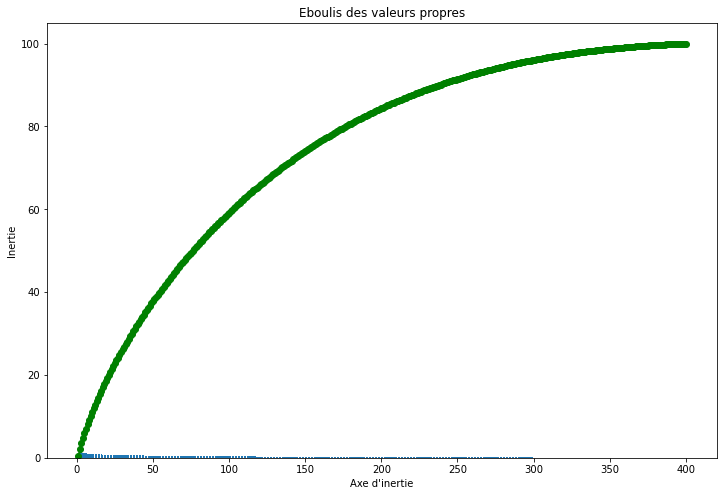

In [17]:
clf = TruncatedSVD(500)
Xpca = clf.fit_transform(X_train)

var_expl = clf.explained_variance_ratio_*100

plt.figure(figsize=(12,8))
plt.bar(np.arange(len(var_expl))+1, var_expl)
plt.plot(np.arange(len(var_expl))+1, var_expl.cumsum(),c="green",marker='o')
plt.xlabel("Axe d'inertie")
plt.ylabel("Inertie")
plt.title("Eboulis des valeurs propres")

In [18]:
print ("Proportion of Variance Explained : ", clf.explained_variance_ratio_)  
    
out_sum = np.cumsum(clf.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.00518979 0.01631506 0.01450461 0.01223409 0.01136728 0.01059372
 0.01024395 0.01003525 0.00983554 0.00961092 0.00939774 0.00906707
 0.00878113 0.00839375 0.00827629 0.00798974 0.0079192  0.00763371
 0.00758413 0.0074848  0.00740722 0.00726328 0.00713521 0.00707596
 0.00691402 0.00686706 0.00680097 0.00664218 0.00654445 0.00651143
 0.00644665 0.00628362 0.0062393  0.00620782 0.00618716 0.00609977
 0.00607556 0.00597633 0.00589515 0.00583824 0.00574315 0.00566464
 0.00563363 0.00558795 0.00553737 0.00546606 0.00542314 0.00536905
 0.00531744 0.00526138 0.00520903 0.00515021 0.00508572 0.00504109
 0.0050248  0.00498842 0.00494246 0.0048991  0.00480941 0.00477545
 0.00475979 0.00473977 0.00470203 0.00465096 0.00462759 0.0045763
 0.00455948 0.00448274 0.00445784 0.00444215 0.00443816 0.00434672
 0.00433714 0.0043318  0.00425357 0.00419968 0.00419273 0.00417698
 0.0041329  0.0040853  0.00407236 0.00405643 0.00399077 0.00398191
 0.00393126 0.00390816 0.00

### Application reduction dimentionelle

In [19]:
clf = TruncatedSVD(300)
clf.fit(X_train)
X_train_transformed = clf.transform(X_train)
X_test_transformed = clf.transform(X_test)
print(f"Nombre de composantes principales: {clf.components_.shape[0]}")

Nombre de composantes principales: 300


In [20]:
X_train_transformed.shape

(400, 300)

In [21]:
X_test_transformed.shape

(100, 300)

## Models

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.svm import SVC

In [23]:
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import classification_report

Afin de comparer les modèles nous avons évalué quatre indicateurs :

* Précision : capacité à prédire correctement les tags associés à chaque document
* Recall : capacité à retourner pour chaque tags tous les documents qui y sont associés
* F1 Score : moyenne harmonique de ces deux indicateurs


Etant face à une classification multi-classes nous utilisons les version micro de ces indicateurs. Concrètement, cette version des indicateurs est calculée par classe puis agrégés là où les indicateurs macro sont calculés globalement. Lors de l’évaluation nous nous intéressons à la précision et au temps d’entraînement. Dans le cadre d’une API de suggestion de tags, la capacité d’un modèle à retourner tous les documents associés à chaque terme n’est pas essentielle. Le recall et le F1 score seront toutefois été observés pour affiner l’analyse.

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, hamming_loss

models_performance = {}


def metrics_report(model_name, test_labels, predictions, performances):
    accuracy = accuracy_score(test_labels, predictions)
    macro_precision = precision_score(
        test_labels, predictions, average='macro')
    macro_recall = recall_score(test_labels, predictions, average='macro')
    macro_f1 = f1_score(test_labels, predictions, average='macro')
    micro_precision = precision_score(
        test_labels, predictions, average='micro')
    micro_recall = recall_score(test_labels, predictions, average='micro')
    micro_f1 = f1_score(test_labels, predictions, average='micro')
    hamLoss = hamming_loss(test_labels, predictions)
    print("------" + model_name + " Model Metrics-----")
    print("Accuracy: {:.4f}\nHamming Loss: {:.4f}\nPrecision:\n  - Macro: {:.4f}\n  - Micro: {:.4f}\nRecall:\n  - Macro: {:.4f}\n  - Micro: {:.4f}\nF1-measure:\n  - Macro: {:.4f}\n  - Micro: {:.4f}"
          .format(accuracy, hamLoss, macro_precision, micro_precision, macro_recall, micro_recall, macro_f1, micro_f1))

    performances[model_name] = {}
    performances[model_name]["micro_precision"] = micro_precision
    performances[model_name]["micro_recall"] = micro_recall
    performances[model_name]["micro_f1"] = micro_f1
    performances[model_name]["training_time"] = training_time

### SVM

In [25]:
# Entraînement du modèle SVM
model = OneVsRestClassifier(SVC(kernel='linear', probability=True))

# Début de la mesure du temps
start_time = time.time()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train_transformed, Y_train)

# Fin de la mesure du temps
end_time = time.time()
training_time = end_time - start_time
# Prédictions sur l'ensemble de test
Y_pred = model.predict(X_test_transformed)
metrics_report("SVM_tfidf", Y_test , Y_pred, models_performance)

------SVM_tfidf Model Metrics-----
Accuracy: 0.0000
Hamming Loss: 0.2615
Precision:
  - Macro: 0.5982
  - Micro: 0.6768
Recall:
  - Macro: 0.3871
  - Micro: 0.5734
F1-measure:
  - Macro: 0.4069
  - Micro: 0.6208


### Decision tree

In [26]:
# Créer le modèle d'arbre de décision
model = DecisionTreeClassifier()

# Début de la mesure du temps
start_time = time.time()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train_transformed, Y_train)

# Fin de la mesure du temps
end_time = time.time()
training_time = end_time - start_time
# Faire des prédictions sur l'ensemble de test
Y_pred = model.predict(X_test_transformed)
metrics_report("Decision tree_tfidf", Y_test , Y_pred, models_performance)

------Decision tree_tfidf Model Metrics-----
Accuracy: 0.0100
Hamming Loss: 0.3674
Precision:
  - Macro: 0.3952
  - Micro: 0.5075
Recall:
  - Macro: 0.4174
  - Micro: 0.5347
F1-measure:
  - Macro: 0.4015
  - Micro: 0.5208


### Random Forest

In [27]:
# Créer le modèle random forest
model = RandomForestClassifier()

# Début de la mesure du temps
start_time = time.time()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train_transformed, Y_train)

# Fin de la mesure du temps
end_time = time.time()
training_time = end_time - start_time

# Faire des prédictions sur l'ensemble de test
Y_pred = model.predict(X_test_transformed)
metrics_report("Random Forest_tfidf", Y_test, Y_pred, models_performance)

------Random Forest_tfidf Model Metrics-----
Accuracy: 0.0000
Hamming Loss: 0.2841
Precision:
  - Macro: 0.3327
  - Micro: 0.6368
Recall:
  - Macro: 0.3358
  - Micro: 0.5565
F1-measure:
  - Macro: 0.2874
  - Micro: 0.5940


### LogisticRegression
La régression logistique, à l’opposé de la classification bayes ,est un modèle de classification discriminant.

Son objectif est de maximiser la probabilité d’avoir une classe y = c étant donné certaines features f(x,c) calculées à partir des observations x. Cette maximisation s’effectue en général avec les méthodes classiques de descente de gradient, avec un terme de régularisation supplémentaire.


In [28]:
# Créer le modèle de Logistic Regression
model = OneVsRestClassifier(LogisticRegression())

# Début de la mesure du temps
start_time = time.time()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train_transformed, Y_train)

# Fin de la mesure du temps
end_time = time.time()
training_time = end_time - start_time

# Faire des prédictions sur l'ensemble de test
Y_pred = model.predict(X_test_transformed)
metrics_report("LogisticRegression_tfidf", Y_test , Y_pred, models_performance)

------LogisticRegression_tfidf Model Metrics-----
Accuracy: 0.0000
Hamming Loss: 0.2704
Precision:
  - Macro: 0.4087
  - Micro: 0.6576
Recall:
  - Macro: 0.3531
  - Micro: 0.5754
F1-measure:
  - Macro: 0.3164
  - Micro: 0.6138


### Résultats

In [29]:
result_df = pd.DataFrame.from_dict(models_performance, orient="index")
result_df

,micro_precision,micro_recall,micro_f1,training_time
SVM_tfidf,0.676815,0.573413,0.620838,2.369070
Decision tree_tfidf,0.507533,0.534722,0.520773,0.566378
Random Forest_tfidf,0.636776,0.556548,0.593965,2.985597
LogisticRegression_tfidf,0.657596,0.575397,0.613757,0.351063


## Word2Vec

In [30]:
import gensim
from gensim.models import Word2Vec

Word2vec est un groupe de modèles utilisé pour le plongement lexical (word embedding). Ces modèles ont été développés par une équipe de recherche chez Google sous la direction de Tomas Mikolov. Ce sont des réseaux de neurones artificiels à deux couches entraînés pour reconstruire le contexte linguistique des mots. La méthode est implémentée dans la bibliothèque Python Gensim.

In [31]:
x = shuffled_data['Words_filtered']
dense_X = np.matrix(x.values).tolist()
sentences = [' '.join(row) for row in dense_X]

In [32]:
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

In [33]:
# Convertir les données en liste de phrases
dense_X = np.matrix(x.values).tolist()
sentences = []
for row in dense_X:
    sentence = []
    for word in row:
        if word in model.wv:
            sentence.append(model.wv[word])
    sentences.append(sentence)

In [34]:
# Convertir les phrases en matrice numpy
X_w2v = np.zeros((len(sentences), 1000))
for i, sentence in enumerate(sentences):
    sentence_array = np.array(sentence)
    X_w2v[i, :sentence_array.shape[0]] = sentence_array.mean(axis=0)

In [35]:
#X = np.array(X_w2v)

In [36]:
X.shape

(500, 762)

In [37]:
Y.shape

(500, 27)

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Text(0.5, 1.0, 'Eboulis des valeurs propres')

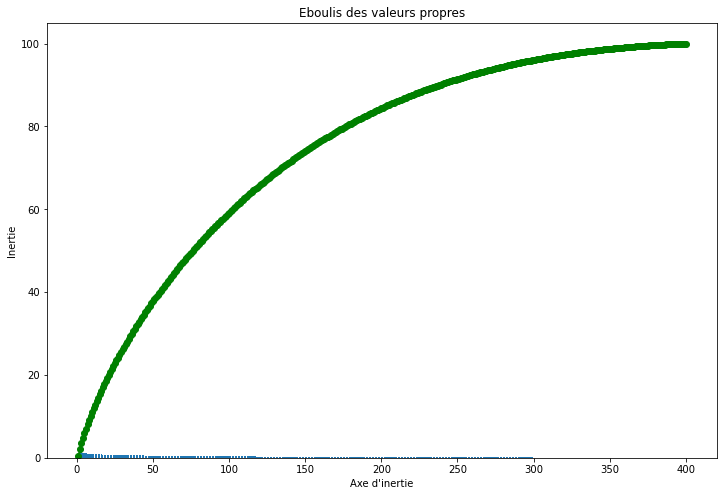

In [39]:
clf = TruncatedSVD(500)
Xpca = clf.fit_transform(X_train)

var_expl = clf.explained_variance_ratio_*100

plt.figure(figsize=(12,8))
plt.bar(np.arange(len(var_expl))+1, var_expl)
plt.plot(np.arange(len(var_expl))+1, var_expl.cumsum(),c="green",marker='o')
plt.xlabel("Axe d'inertie")
plt.ylabel("Inertie")
plt.title("Eboulis des valeurs propres")

In [40]:
print ("Proportion of Variance Explained : ", clf.explained_variance_ratio_)  
    
out_sum = np.cumsum(clf.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.00518979 0.01631506 0.01450461 0.01223409 0.01136728 0.01059372
 0.01024395 0.01003525 0.00983554 0.00961092 0.00939774 0.00906707
 0.00878113 0.00839375 0.00827629 0.00798974 0.0079192  0.00763371
 0.00758413 0.0074848  0.00740722 0.00726328 0.00713521 0.00707596
 0.00691402 0.00686706 0.00680097 0.00664218 0.00654445 0.00651143
 0.00644665 0.00628362 0.0062393  0.00620782 0.00618716 0.00609977
 0.00607556 0.00597633 0.00589515 0.00583824 0.00574315 0.00566464
 0.00563363 0.00558795 0.00553737 0.00546606 0.00542314 0.00536905
 0.00531744 0.00526138 0.00520903 0.00515021 0.00508572 0.00504109
 0.0050248  0.00498842 0.00494246 0.0048991  0.00480941 0.00477545
 0.00475979 0.00473977 0.00470203 0.00465096 0.00462759 0.0045763
 0.00455948 0.00448274 0.00445784 0.00444215 0.00443816 0.00434672
 0.00433714 0.0043318  0.00425357 0.00419968 0.00419273 0.00417698
 0.0041329  0.0040853  0.00407236 0.00405643 0.00399077 0.00398191
 0.00393126 0.00390816 0.00

In [41]:
clf = TruncatedSVD(300)
clf.fit(X_train)
X_train_transformed = clf.transform(X_train)
X_test_transformed = clf.transform(X_test)
print(f"Nombre de composantes principales: {clf.components_.shape[0]}")

Nombre de composantes principales: 300


### Models

In [42]:
# Entraînement du modèle SVM
model = OneVsRestClassifier(SVC(kernel='linear', probability=True))

# Début de la mesure du temps
start_time = time.time()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train_transformed, Y_train)

# Fin de la mesure du temps
end_time = time.time()
training_time = end_time - start_time
# Prédictions sur l'ensemble de test
Y_pred = model.predict(X_test_transformed)
metrics_report("SVM_W2V", Y_test , Y_pred, models_performance)

------SVM_W2V Model Metrics-----
Accuracy: 0.0000
Hamming Loss: 0.2656
Precision:
  - Macro: 0.5779
  - Micro: 0.6690
Recall:
  - Macro: 0.3837
  - Micro: 0.5714
F1-measure:
  - Macro: 0.4004
  - Micro: 0.6164


In [43]:
# Créer le modèle d'arbre de décision
model = DecisionTreeClassifier()

# Début de la mesure du temps
start_time = time.time()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train_transformed, Y_train)

# Fin de la mesure du temps
end_time = time.time()
training_time = end_time - start_time
# Faire des prédictions sur l'ensemble de test
Y_pred = model.predict(X_test_transformed)
metrics_report("Decision tree_W2V", Y_test , Y_pred, models_performance)

------Decision tree_W2V Model Metrics-----
Accuracy: 0.0500
Hamming Loss: 0.3441
Precision:
  - Macro: 0.4119
  - Micro: 0.5425
Recall:
  - Macro: 0.3744
  - Micro: 0.5000
F1-measure:
  - Macro: 0.3876
  - Micro: 0.5204


In [44]:
# Créer le modèle random forest
model = RandomForestClassifier()

# Début de la mesure du temps
start_time = time.time()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train_transformed, Y_train)

# Fin de la mesure du temps
end_time = time.time()
training_time = end_time - start_time

# Faire des prédictions sur l'ensemble de test
Y_pred = model.predict(X_test_transformed)
metrics_report("Random Forest_W2V", Y_test, Y_pred, models_performance)

------Random Forest_W2V Model Metrics-----
Accuracy: 0.0000
Hamming Loss: 0.2819
Precision:
  - Macro: 0.2942
  - Micro: 0.6392
Recall:
  - Macro: 0.3394
  - Micro: 0.5625
F1-measure:
  - Macro: 0.2909
  - Micro: 0.5984


### Résulats

In [45]:
result_df = pd.DataFrame.from_dict(models_performance, orient="index")
result_df

,micro_precision,micro_recall,micro_f1,training_time
SVM_tfidf,0.676815,0.573413,0.620838,2.369070
Decision tree_tfidf,0.507533,0.534722,0.520773,0.566378
Random Forest_tfidf,0.636776,0.556548,0.593965,2.985597
LogisticRegression_tfidf,0.657596,0.575397,0.613757,0.351063
SVM_W2V,0.668990,0.571429,0.616372,2.058678
Decision tree_W2V,0.542519,0.500000,0.520392,0.566107
Random Forest_W2V,0.639233,0.562500,0.598417,2.759139


## USE

In [46]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [47]:
X = shuffled_data['Words_filtered']

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [49]:
def feature_USE_fct(sentences, b_size):
    feat_list = []
    batch_size = b_size
    
    for step in range(len(sentences)//batch_size):
        start_idx = step * batch_size
        end_idx = (step + 1) * batch_size
        embeddings = embed(sentences[start_idx:end_idx])
        feat_list.append(embeddings)
        
    if sentences.shape[0] % batch_size != 0:
        embeddings = embed(sentences[-(sentences.shape[0] % batch_size):])
        feat_list.append(embeddings)
        
    return np.concatenate(feat_list)

In [50]:
b_size=7
X_train_use=feature_USE_fct(X_train,b_size)
X_test_use=feature_USE_fct(X_test,b_size)

In [51]:
X_train_use.shape

(400, 512)

In [52]:
X_test_use.shape

(100, 512)

### Model

In [53]:
# Entraînement du modèle SVM
model = OneVsRestClassifier(SVC(kernel='linear', probability=True))

# Début de la mesure du temps
start_time = time.time()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train_use, Y_train)

# Fin de la mesure du temps
end_time = time.time()
training_time = end_time - start_time
# Prédictions sur l'ensemble de test
Y_pred = model.predict(X_test_use)
metrics_report("SVM_USE", Y_test , Y_pred, models_performance)

------SVM_USE Model Metrics-----
Accuracy: 0.0000
Hamming Loss: 0.2633
Precision:
  - Macro: 0.4450
  - Micro: 0.6737
Recall:
  - Macro: 0.3782
  - Micro: 0.5714
F1-measure:
  - Macro: 0.3850
  - Micro: 0.6184


In [54]:
# Créer le modèle d'arbre de décision
model = DecisionTreeClassifier()

# Début de la mesure du temps
start_time = time.time()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train_use, Y_train)

# Fin de la mesure du temps
end_time = time.time()
training_time = end_time - start_time
# Prédictions sur l'ensemble de test
Y_pred = model.predict(X_test_use)
metrics_report("Decision tree_USE", Y_test , Y_pred, models_performance)

------Decision tree_USE Model Metrics-----
Accuracy: 0.0200
Hamming Loss: 0.3415
Precision:
  - Macro: 0.4185
  - Micro: 0.5450
Recall:
  - Macro: 0.3963
  - Micro: 0.5169
F1-measure:
  - Macro: 0.4045
  - Micro: 0.5305


In [55]:
# Créer le modèle d'arbre de décision
model = RandomForestClassifier()

# Début de la mesure du temps
start_time = time.time()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train_use, Y_train)

# Fin de la mesure du temps
end_time = time.time()
training_time = end_time - start_time
# Prédictions sur l'ensemble de test
Y_pred = model.predict(X_test_use)
metrics_report("Random Forest_USE", Y_test, Y_pred, models_performance)

------Random Forest_USE Model Metrics-----
Accuracy: 0.0100
Hamming Loss: 0.2541
Precision:
  - Macro: 0.4778
  - Micro: 0.6813
Recall:
  - Macro: 0.3779
  - Micro: 0.6002
F1-measure:
  - Macro: 0.3562
  - Micro: 0.6382


### Résultats

In [56]:
result_df = pd.DataFrame.from_dict(models_performance, orient="index")
result_df

,micro_precision,micro_recall,micro_f1,training_time
SVM_tfidf,0.676815,0.573413,0.620838,2.369070
Decision tree_tfidf,0.507533,0.534722,0.520773,0.566378
Random Forest_tfidf,0.636776,0.556548,0.593965,2.985597
LogisticRegression_tfidf,0.657596,0.575397,0.613757,0.351063
SVM_W2V,0.668990,0.571429,0.616372,2.058678
Decision tree_W2V,0.542519,0.500000,0.520392,0.566107
Random Forest_W2V,0.639233,0.562500,0.598417,2.759139
SVM_USE,0.673684,0.571429,0.618357,3.429947
Decision tree_USE,0.544979,0.516865,0.530550,1.183582
Random Forest_USE,0.681306,0.600198,0.638186,2.925829


## BERT

In [57]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import AutoTokenizer, AutoConfig, TFAutoModel    

#from transformers import *
os.environ["TF_KERAS"]='1'
     

In [58]:
X = shuffled_data['Words_filtered']

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [60]:
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    bert_inputs = bert_tokenizer(sentences, 
                                 padding='max_length',
                                 truncation=True,
                                 max_length=max_length,
                                 return_tensors='tf')

    if mode == 'HF':
        last_hidden_states = model(bert_inputs)['last_hidden_state']
    elif mode == 'TFhub':
        text_preprocessed = {"input_word_ids": bert_inputs['input_ids'],
                             "input_mask": bert_inputs['attention_mask'],
                             "input_type_ids": bert_inputs['token_type_ids']}
        last_hidden_states = model(text_preprocessed)['sequence_output']

    features_bert = np.array(last_hidden_states).mean(axis=1)

    return features_bert

In [61]:
X_train_text = [' '.join(text) for text in X_train]
X_test_text = [' '.join(text) for text in X_test]

In [62]:
import tensorflow_hub as hub
# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [63]:
max_length = 64
batch_size = 7
model_type = 'bert-base-uncased'
model = bert_layer
X_train_bert = feature_BERT_fct(model, model_type, X_train_text, max_length, batch_size, mode='TFhub')
X_test_bert = feature_BERT_fct(model, model_type, X_test_text, max_length, batch_size, mode='TFhub')

In [64]:
X_train_bert.shape

(400, 768)

In [65]:
X_test_bert.shape

(100, 768)

### Models

In [66]:
# Entraînement du modèle SVM
model = OneVsRestClassifier(SVC(kernel='linear', probability=True))

# Début de la mesure du temps
start_time = time.time()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train_bert, Y_train)

# Fin de la mesure du temps
end_time = time.time()
training_time = end_time - start_time
# Prédictions sur l'ensemble de test
Y_pred = model.predict(X_test_bert)
metrics_report("SVM_BERT", Y_test , Y_pred, models_performance)

------SVM_BERT Model Metrics-----
Accuracy: 0.0000
Hamming Loss: 0.2844
Precision:
  - Macro: 0.4411
  - Micro: 0.6333
Recall:
  - Macro: 0.3719
  - Micro: 0.5655
F1-measure:
  - Macro: 0.3707
  - Micro: 0.5975


In [67]:
# Créer le modèle d'arbre de décision
model = DecisionTreeClassifier()

# Début de la mesure du temps
start_time = time.time()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train_bert, Y_train)

# Fin de la mesure du temps
end_time = time.time()
training_time = end_time - start_time
# Prédictions sur l'ensemble de test
Y_pred = model.predict(X_test_bert)
metrics_report("Decision tree_BERT", Y_test , Y_pred, models_performance)

------Decision tree_BERT Model Metrics-----
Accuracy: 0.0000
Hamming Loss: 0.3715
Precision:
  - Macro: 0.3766
  - Micro: 0.5027
Recall:
  - Macro: 0.3384
  - Micro: 0.4653
F1-measure:
  - Macro: 0.3520
  - Micro: 0.4833


In [68]:
# Créer le modèle random forest
model = RandomForestClassifier()

# Début de la mesure du temps
start_time = time.time()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train_bert, Y_train)

# Fin de la mesure du temps
end_time = time.time()
training_time = end_time - start_time
# Prédictions sur l'ensemble de test
Y_pred = model.predict(X_test_bert)
metrics_report("Random Forest_BERT", Y_test, Y_pred, models_performance)

------Random Forest_BERT Model Metrics-----
Accuracy: 0.0000
Hamming Loss: 0.2811
Precision:
  - Macro: 0.3256
  - Micro: 0.6326
Recall:
  - Macro: 0.3593
  - Micro: 0.5893
F1-measure:
  - Macro: 0.3096
  - Micro: 0.6102


### Résultats

In [69]:
result_df = pd.DataFrame.from_dict(models_performance, orient="index")
result_df

,micro_precision,micro_recall,micro_f1,training_time
SVM_tfidf,0.676815,0.573413,0.620838,2.369070
Decision tree_tfidf,0.507533,0.534722,0.520773,0.566378
Random Forest_tfidf,0.636776,0.556548,0.593965,2.985597
LogisticRegression_tfidf,0.657596,0.575397,0.613757,0.351063
SVM_W2V,0.668990,0.571429,0.616372,2.058678
Decision tree_W2V,0.542519,0.500000,0.520392,0.566107
Random Forest_W2V,0.639233,0.562500,0.598417,2.759139
SVM_USE,0.673684,0.571429,0.618357,3.429947
Decision tree_USE,0.544979,0.516865,0.530550,1.183582
Random Forest_USE,0.681306,0.600198,0.638186,2.925829


## Optimisation

# Models non supervisés

In [70]:
import gensim
from gensim.models import TfidfModel
import gensim.corpora as corpora
from gensim import models
from gensim.utils import simple_preprocess
from gensim.models.ldamulticore import LdaMulticore
from gensim.models import CoherenceModel
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import logging
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

##  Latent Dirichlet Allocation (LDA)
C’est une méthode non-supervisée générative qui se base sur les hypothèses suivantes :

* Chaque document du corpus est un ensemble de mots sans ordre (bag-of-words) ;

* Chaque document aborde un certain nombre de thèmes dans différentes proportions qui lui sont propres p(θm)

* Chaque mot possède une distribution associée à chaque thème p(ϕk). On peut ainsi représenter chaque thème par une probabilité sur chaque mot.

* zn représente le thème du mot wn

On peut déterminer quels sont les thèmes, les distributions de chaque mot sur les thèmes, la fréquence d’apparition de chaque thème sur le corpus.

Une représentation formelle sous forme de modèle probabiliste graphique est la suivante :

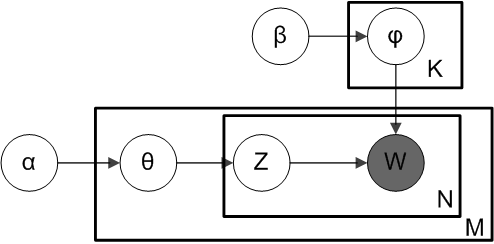

In [71]:
# Créer une liste de listes de mots à partir de la colonne 'Words_filtered'
documents = df['Words_filtered'].apply(lambda x: x.split()).tolist()

# Créer le dictionnaire de mots avec gensim
gensim_dictionary = corpora.Dictionary(documents)

# Créer le corpus de documents sous forme de sac de mots avec le dictionnaire
corpus = [gensim_dictionary.doc2bow(doc) for doc in documents]

In [72]:
#printing the corpus we created above.
print(corpus[:3]) 

[[(0, 1), (1, 1), (2, 3), (3, 2), (4, 1), (5, 1), (6, 1), (7, 3), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)], [(15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 3), (21, 1), (22, 1), (23, 2), (24, 3), (25, 1), (26, 3), (27, 1), (28, 2), (29, 1), (30, 2)], [(2, 1), (8, 1), (14, 3), (24, 2), (25, 1), (30, 1), (31, 2), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 4), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1)]]


In [73]:
#we can print the words with their frequencies.

[[(gensim_dictionary[id], freq) for id, freq in cp] for cp in corpus[:4]] 

[[('block', 1),
  ('ideas', 1),
  ('like', 3),
  ('looks', 2),
  ('made', 1),
  ('node', 1),
  ('null', 1),
  ('path', 3),
  ('property', 1),
  ('run', 1),
  ('see', 1),
  ('self', 1),
  ('test', 1),
  ('thanks', 1),
  ('window', 1)],
 [('application', 1),
  ('cant', 1),
  ('cause', 1),
  ('debug', 1),
  ('double', 2),
  ('error', 3),
  ('figure', 1),
  ('find', 1),
  ('free', 2),
  ('im', 3),
  ('know', 1),
  ('object', 3),
  ('release', 1),
  ('set', 2),
  ('way', 1),
  ('x', 2)],
 [('like', 1),
  ('property', 1),
  ('window', 3),
  ('im', 2),
  ('know', 1),
  ('x', 1),
  ('approach', 2),
  ('button', 1),
  ('code', 1),
  ('command', 1),
  ('display', 1),
  ('doesnt', 1),
  ('event', 4),
  ('good', 2),
  ('gt', 1),
  ('handle', 1),
  ('id', 1),
  ('message', 1),
  ('order', 1),
  ('right', 1),
  ('sure', 1),
  ('think', 1),
  ('use', 1),
  ('user', 1),
  ('work', 1),
  ('would', 1),
  ('wpf', 1)],
 [('like', 1),
  ('im', 3),
  ('set', 2),
  ('approach', 1),
  ('use', 1),
  ('activity

In [ ]:
# stock result of coherence and perplexity score
results =[]

# loop for find the best topic :
for n_topics in [5,6, 7, 8, 9, 10, 11, 12]:
    
    # creating the LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=gensim_dictionary,
                                                num_topics=n_topics,
                                                random_state=0,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto'
                                               )

    # creation score :
    Perplexity_Score = lda_model.log_perplexity(corpus)
    Coherence_Score = CoherenceModel(model=lda_model,
                                     texts=documents,
                                     dictionary=gensim_dictionary,
                                     coherence='c_v'
                                     ).get_coherence()
    
    # Visualize the results :
    print('-'*40)
    print(f" For {n_topics} topics :")
    print('-'*40)
    print('')

    # Compute Perplexity
    print(f"Perplexity Score : {Perplexity_Score}") # a measure of how good the model is. lower the better.
    print('')
    
    # Compute Coherence Score
    print(f"Coherence Score : {Coherence_Score}")
    
    results.append([n_topics, Perplexity_Score, Coherence_Score])

----------------------------------------
 For 5 topics :
----------------------------------------

Perplexity Score : -6.087553150071963

Coherence Score : 0.5380529016809851
----------------------------------------
 For 6 topics :
----------------------------------------

Perplexity Score : -6.084193816391651

Coherence Score : 0.5468654230261752
----------------------------------------
 For 7 topics :
----------------------------------------

Perplexity Score : -6.069763817880056

Coherence Score : 0.5330921060310281
----------------------------------------
 For 8 topics :
----------------------------------------

Perplexity Score : -6.079000499482984

Coherence Score : 0.5132927195354562
----------------------------------------
 For 9 topics :
----------------------------------------

Perplexity Score : -6.071302511846035

Coherence Score : 0.5101216404861061


In [ ]:
plt.figure(figsize=(15, 15))
fig,ax= plt.subplots()

# 1st line :
ax.plot([line[0] for line in results],
        [line[1] for line in results],
        color = "b",
        label = 'perplexity_score')
ax.set_ylabel('perplexity_score')
ax.set_xlabel('Number of Topics')


# to have same size for score :
ax2 = ax.twinx()

# 2nd line :
ax2.plot([line[0] for line in results],
        [line[2] for line in results],
        color = "g",
        label = 'coherence_score')
ax2.set_ylabel('coherence_score')

fig.legend()

### Optimisation LDA

In [ ]:
# number of topics
num_topics = 6

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=gensim_dictionary,
                                       num_topics=num_topics)

# Define the number of top words to print for each topic
no_top_words = 20

# Print the top words in the 6 topics
for topic_idx in range(num_topics):
    print("Topic {}:".format(topic_idx))
    top_words = lda_model.get_topic_terms(topic_idx, topn=no_top_words)
    top_word_strings = [gensim_dictionary[i] for i, _ in top_words]
    print(" ".join(top_word_strings))
    print()

doc_lda = lda_model[corpus]

### Analyzing LDA model results

Maintenant que nous disposons d'un modèle entraîné, visualisons les sujets pour en faciliter l'interprétation. Pour ce faire, nous utiliserons un paquetage de visualisation populaire, pyLDAvis, qui est conçu pour aider de manière interactive à :

Mieux comprendre et interpréter les sujets individuels, et
Mieux comprendre les relations entre les sujets.
Pour (1), vous pouvez sélectionner manuellement chaque sujet pour visualiser les termes les plus fréquents et/ou les plus "pertinents", en utilisant différentes valeurs du paramètre λ. Cela peut s'avérer utile lorsque vous essayez d'attribuer un nom ou une "signification" interprétable par l'homme à chaque thème.

Pour (2), l'exploration du graphe de la distance inter-sujets peut vous aider à comprendre comment les sujets sont liés les uns aux autres, y compris une structure potentielle de plus haut niveau entre les groupes de sujets.

## NMF

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

In [ ]:
# Define the number of features to use
no_features = 1000

# Define the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, 
                                    min_df=2, 
                                    max_features=no_features, 
                                    stop_words='english')

# Fit and transform the TF-IDF matrix
tfidf = tfidf_vectorizer.fit_transform(Words)

# Get the feature names from the TF-IDF vectorizer
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# Define the number of topics for NMF
no_topics = 6

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')
nmf.fit(tfidf)

# Define the number of top words to display for each topic
no_top_words = 20

# Display the top words for each topic
display_topics(nmf, tfidf_feature_names, no_top_words)